[*********************100%%**********************]  1 of 1 completed


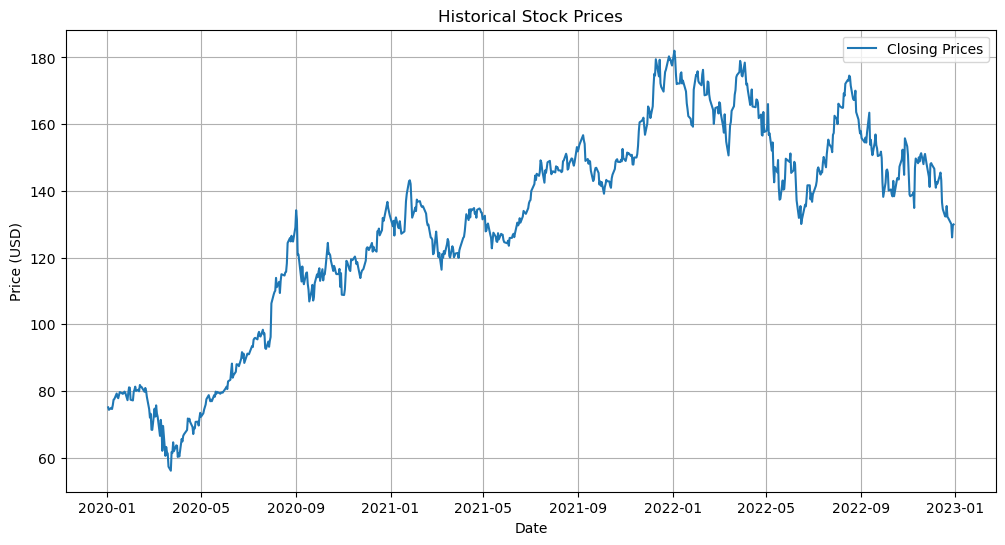

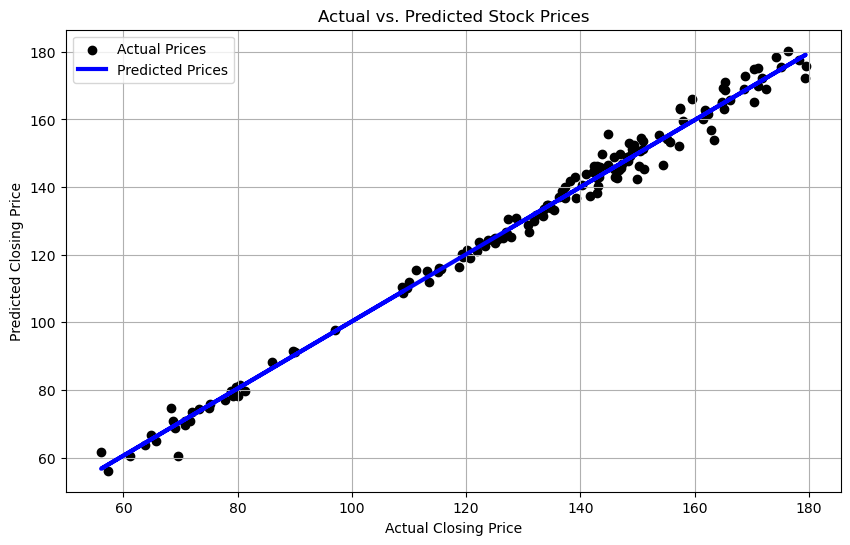


Mean Absolute Error (MAE): 2.22
Mean Squared Error (MSE): 9.32
Root Mean Squared Error (RMSE): 3.05
R-squared (R2) Score: 0.99


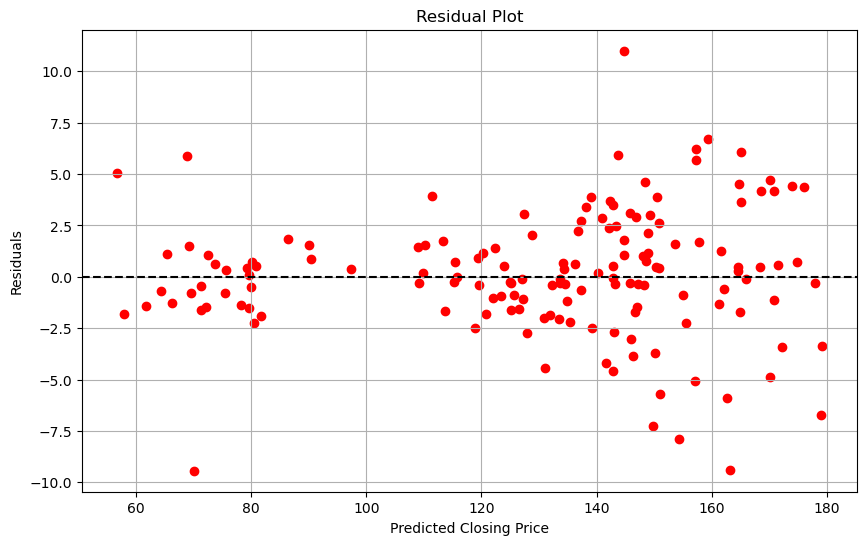

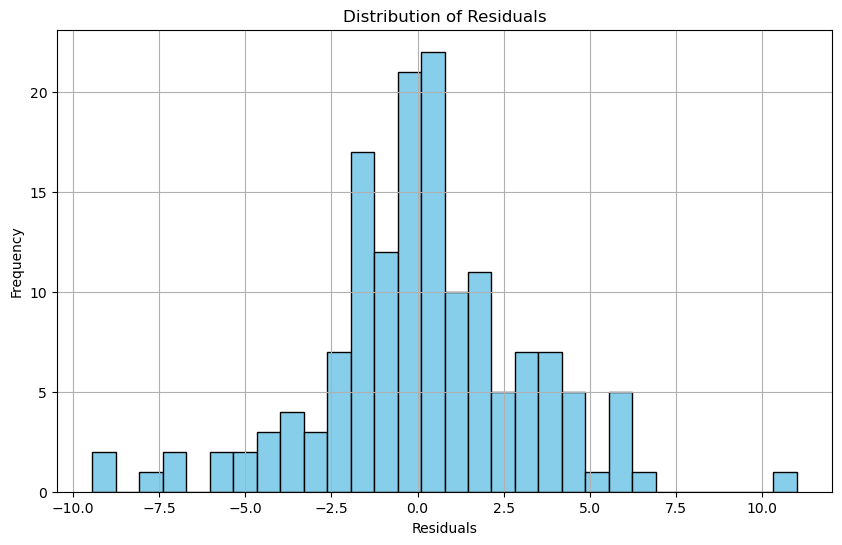

In [3]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




stock_symbol = 'AAPL'  # Example: Apple stock
stock_data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

# Plotting the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Prices')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Creating target variable (shifted by one day) and removing NaN values
y = stock_data['Close'].shift(-1).dropna().values
X = stock_data['Close'][:-1].values

# Reshape X to a 2D array (required for sklearn)
X = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting test set results
predictions = model.predict(X_test)

# Visualizing the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Prices')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'\nMean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


# Plotting residuals (difference between actual and predicted prices)
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Closing Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(True)
plt.show()


# Visualizing the residuals distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#testing git on local machine